In [238]:
import os
os.chdir(r'C:\Users\kikik\Desktop\3.2\data analytic')
os.getcwd()

'C:\\Users\\kikik\\Desktop\\3.2\\data analytic'

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [240]:
df = pd.read_csv("movie_data.csv")
df.head()

,Title,Genre,Director,Year,Runtime,Rating,Votes
0,Guardians of the Galaxy,Action,James Gunn,2014,121,8.1,757074
1,Prometheus,Adventure,Ridley Scott,2012,124,7.0,485820
2,Split,Horror,M. Night Shyamalan,2016,117,7.3,157606
3,Sing,Animation,Christophe Lourdelet,2016,108,7.2,60545
4,Suicide Squad,Action,David Ayer,2016,123,6.2,393727


# Question 1 

In [241]:
selected_var = "Genre"
df1 = df
df1[selected_var].describe()

count       1000
unique        13
top       Action
freq         293
Name: Genre, dtype: object

# Question 2

In [242]:
df1.groupby('Runtime').max()

,Title,Genre,Director,Year,Rating,Votes
Runtime,,,,,,
66,Ma vie de Courgette,Animation,Claude Barras,2016,7.8,4370
73,Wolves at the Door,Horror,Shawn Burkett,2016,4.6,564
80,La tortue rouge,Animation,Michael Dudok de Wit,2016,7.6,11482
81,The Thinning,Thriller,Mike Flanagan,2016,6.6,69823
82,Tramps,Comedy,Adam Leon,2016,6.5,1031
...,...,...,...,...,...,...
170,3 Idiots,Comedy,Rajkumar Hirani,2009,8.4,238789
172,Cloud Atlas,Drama,Tom Tykwer,2012,7.5,298651
180,The Wolf of Wall Street,Drama,Martin Scorsese,2013,8.2,865134


# Question 3

In [243]:
df1.groupby(df1.Genre == 'Horror').mean()

,Year,Runtime,Rating,Votes
Genre,,,,
False,2012.759958,113.915094,6.764465,174165.855346
True,2013.260870,97.760870,5.867391,79435.413043


# Question 4

In [244]:
df1.groupby("Year").mean()

,Runtime,Rating,Votes
Year,,,
2006,120.840909,7.125000,269289.954545
2007,121.622642,7.133962,244331.037736
2008,110.826923,6.784615,275505.384615
2009,116.117647,6.960784,255780.647059
2010,111.133333,6.826667,252782.316667
2011,114.603175,6.838095,240790.301587
2012,119.109375,6.925000,285226.093750
2013,116.065934,6.812088,219049.648352
2014,114.489796,6.837755,203930.224490


# Question 5

In [245]:
df1["Director"].describe()

count             1000
unique             644
top       Ridley Scott
freq                 8
Name: Director, dtype: object

# Question 6

Text(0, 0.5, 'Probability')

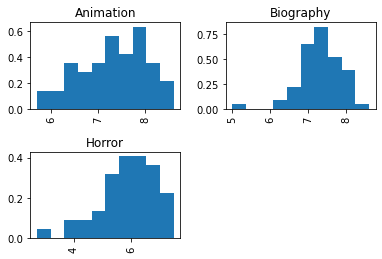

In [246]:
selected_var = 'Rating'
temp_df = df[df.Genre.isin(['Animation','Biography','Horror'])]
temp_df.hist(selected_var, by='Genre', density=True)
plt.title('Probability of Rating')
plt.ylabel('Probability')

# Question 7

Text(0, 0.5, 'Frequency')

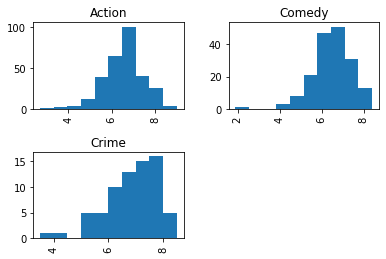

In [247]:
selected_var = 'Rating'
temp_df = df[df.Genre.isin(['Action','Comedy','Crime'])]
temp_df.hist(selected_var, by='Genre')
plt.title('Frequency of Rating')
plt.ylabel('Frequency')

# Question 8

Text(0, 0.5, 'Probability')

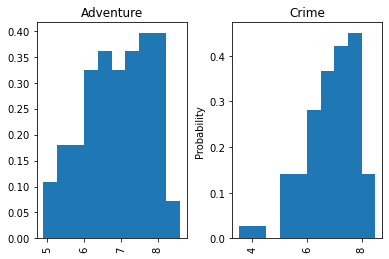

In [248]:
selected_var = 'Rating'
temp_df = df[df.Genre.isin(['Adventure','Crime'])]
temp_df.hist(selected_var, by='Genre', density=True)
plt.ylabel('Probability')

# Question 9

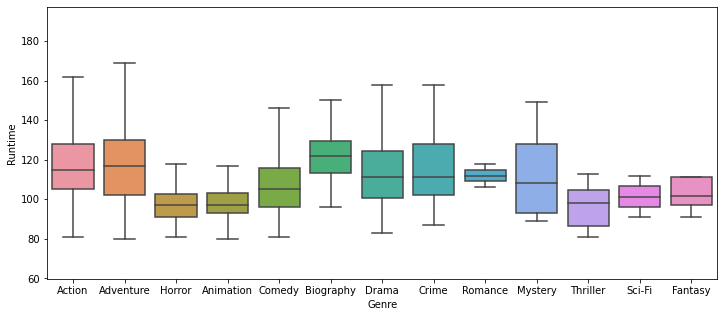

In [249]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Genre', y='Runtime', data=df, fliersize=0)

# Question 10

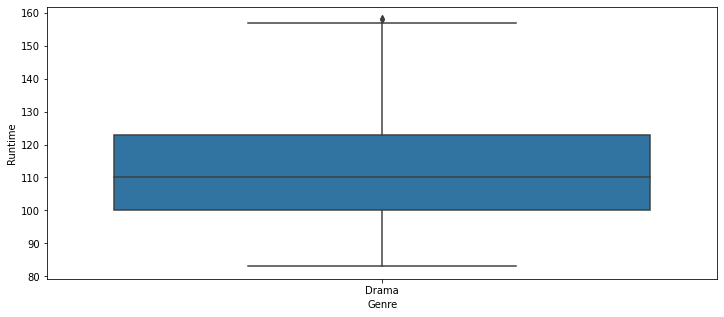

In [250]:
outlier_var = 'Runtime'
df2 = df
df2 = df2[df2.Genre == 'Drama']
q1 = df2[outlier_var].quantile(0.25)
q3 = df2[outlier_var].quantile(0.75)
iqr = q3-q1
temp_df = df2[~((df2[outlier_var] < q1-1.5*iqr) | (df2[outlier_var] > q3+1.5*iqr))]
plt.figure(figsize=(12,5))
sns.boxplot(x='Genre', y='Runtime', data=temp_df)

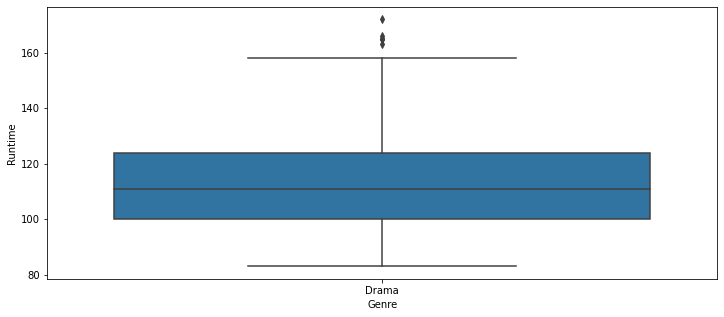

In [251]:
mean = df2[outlier_var].mean()
sd = df2[outlier_var].std()
temp_df2 = df2[~((df2[outlier_var] < mean-3*sd) | (df2[outlier_var] > mean+3*sd))]
plt.figure(figsize=(12,5))
sns.boxplot(x='Genre', y='Runtime', data=temp_df2)

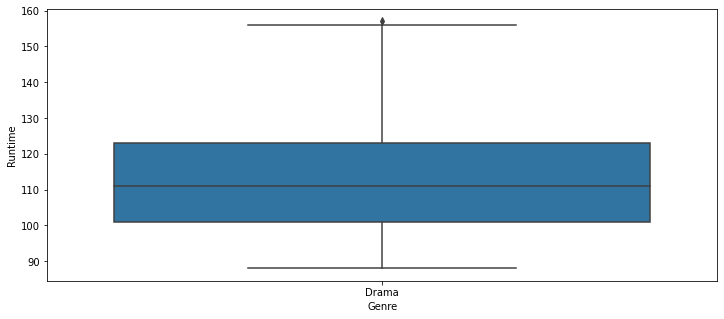

In [252]:
p05 = df2[outlier_var].quantile(0.05)
p95 = df2[outlier_var].quantile(0.95)
temp_df3 = df2[~((df2[outlier_var] < p05) | (df2[outlier_var] > p95))]
plt.figure(figsize=(12,5))
sns.boxplot(x='Genre', y='Runtime', data=temp_df3)

# Question 11

In [253]:
temp_df = df
temp_df.groupby("Year").count()

,Title,Genre,Director,Runtime,Rating,Votes
Year,,,,,,
2006,44,44,44,44,44,44
2007,53,53,53,53,53,53
2008,52,52,52,52,52,52
2009,51,51,51,51,51,51
2010,60,60,60,60,60,60
2011,63,63,63,63,63,63
2012,64,64,64,64,64,64
2013,91,91,91,91,91,91
2014,98,98,98,98,98,98


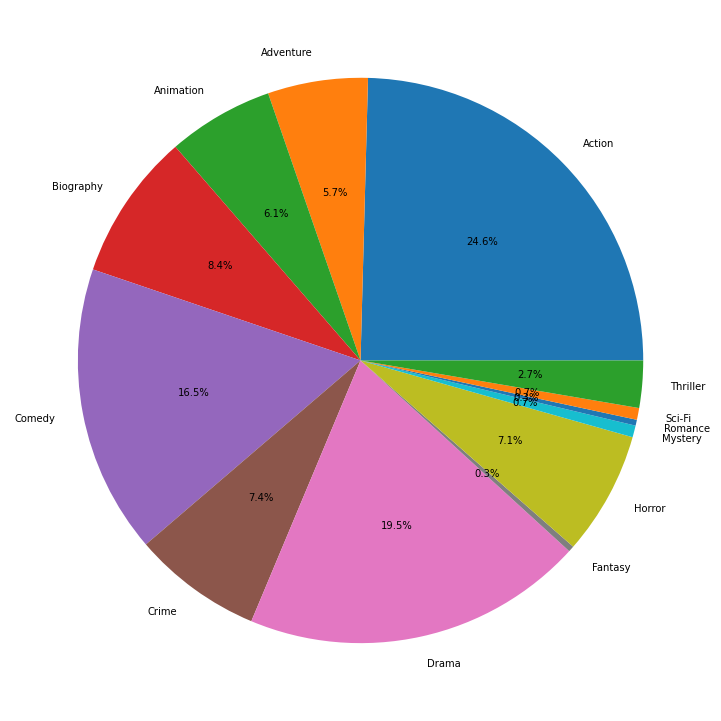

In [254]:
df3 = df[df.Year == 2016]
temp_df = df3.groupby("Genre").count()
fig = plt.figure(figsize=(13,13))
plt.pie(temp_df['Title'], labels = temp_df.index, autopct='%1.1f%%')
plt.savefig('survived_embarked_pie.jpg')

# Question 12

In [255]:
temp_df = df[df['Title'].str.contains("X-Men")]
temp_df

,Title,Genre,Director,Year,Runtime,Rating,Votes
32,X-Men: Apocalypse,Action,Bryan Singer,2016,144,7.1,275510
162,X-Men: Days of Future Past,Action,Bryan Singer,2014,132,8.0,552298
268,X-Men Origins: Wolverine,Action,Gavin Hood,2009,107,6.7,388447
626,X-Men: The Last Stand,Action,Brett Ratner,2006,104,6.7,406540


# Question 13

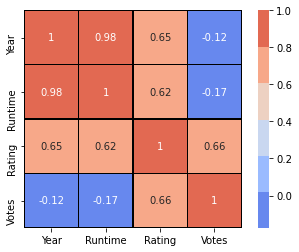

In [256]:
sns.heatmap(temp_df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)

# Question 14

Text(0, 0.5, 'Frequency')

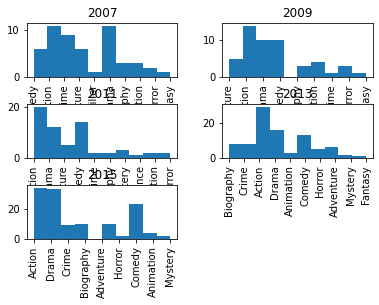

In [257]:
selected_var = 'Genre'
temp_df = df[(df.Year% 2) != 0]
temp_df.hist(selected_var, by='Year')
plt.title('Frequency of Rating')
plt.ylabel('Frequency')

# Question 15

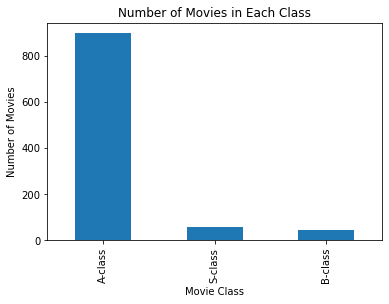

In [258]:
df4 = df.sort_values(by='Rating',ascending=False,inplace=False)
df4['Class'] = pd.cut(df4['Rating'], bins=[0, 4.99, 8, 10], labels=['B-class', 'A-class', 'S-class'])
df4['Class'].value_counts().plot(kind='bar')
plt.xlabel('Movie Class')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Class')
plt.show()